In [ ]:
from numpy import sctype2char
from google.colab import drive
drive.mount('/content/drive')

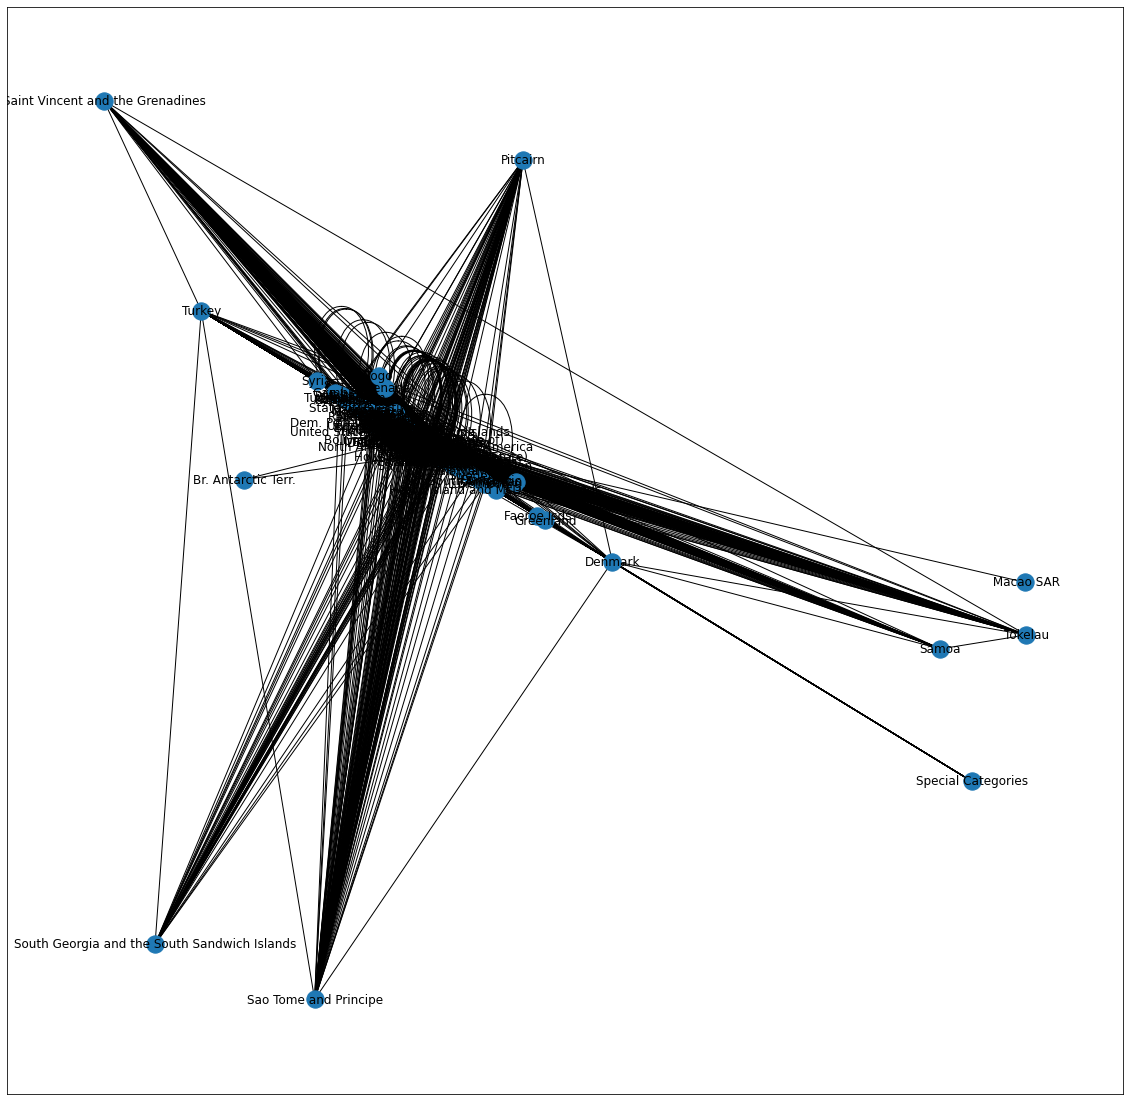

In [ ]:
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
datafile = open("comtradesheets.csv", "r")

import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np

g = nx.Graph()

# ['Export', 'Brazil', 'Bangladesh', 'All Commodities', '1824425117\n']

for line in datafile:
    l = line.replace('"','')      #get rid of any quotes in country names 
    l = l.replace('\'','')
    l = l.split(',')
    reporter = l[1]
    partner = l[2]
    trade_flow = l[0]
    trade_value = l[-1]
  
    if reporter != 'Reporter' or partner != 'Partner': #get rid of column titles
      if reporter not in g.nodes:
        g.add_node(reporter)
      if partner not in g.nodes:
        g.add_node(partner)

      if trade_flow == 'Export': 
        g.add_weighted_edges_from([(reporter, partner, int(trade_value))])

      elif trade_flow == 'Import': 
        g.add_weighted_edges_from([(reporter, partner, -1 * int(trade_value))])


#Draw a Basic Graph using matplotlib 
plt.figure(figsize = (20,20))
nx.draw_networkx(g, with_labels = True)


Degree Centrality: 

In [ ]:
#Degree Centrality
deg_centrality = nx.degree_centrality(g)
sorted_deg_centrality = sorted(deg_centrality.items(), key=lambda x:x[1])
sorted_deg_centrality.reverse()
print(sorted_deg_centrality)

Closeness Centrality:

In [ ]:
#Closeness Centrality
close_centrality = nx.closeness_centrality(g)
sorted_close_centrality = sorted(close_centrality.items(), key=lambda x:x[1])
sorted_close_centrality.reverse()
print(sorted_close_centrality)

Betweenness Centrality:

In [ ]:
#Betweenness Centrality 
between_centrality = nx.betweenness_centrality(g)
sorted_between_centrality = sorted(between_centrality.items(), key=lambda x:x[1])
sorted_between_centrality.reverse()
print(sorted_between_centrality)


Find Strongly Connected Components:

In [ ]:
#Strongly Connected Components 
dir = g.to_directed()
scc = list(nx.strongly_connected_components(dir))
print(scc)
print(len(scc))

Find the Shortest Path in the Graph:

In [ ]:
#Shortest Path 
avg = average_shortest_path_length(g)
print(avg)

1.4165607226497157


Estimate the Number of Triangles in the Graph:

In [ ]:
# Function to Estimate the Number of Triangles in the Graph
# Formula: number of triangles = (1/6)∑𝜆(i)^3
def estimate_triangles(graph):
    # convert graph to numpy array (matrix)
    graph_matrix = nx.to_numpy_array(graph)

    # cube the matrix
    graph_matrix_3 = np.linalg.matrix_power(graph_matrix, 3)

    # get the trace (sum of diagonal entries)
    trace = np.trace(graph_matrix_3)

    # divide by 6 to get total number of triangles and return value
    return int(trace / 6)

# print the number of triangles
triangles = estimate_triangles(g)
print("There are " + str(triangles) + " triangles in the world trade graph")


There are 18544754561311632783653256751480832 triangles in the world trade graph


Degree Distribution Graphs (PDF, CCDF, ZIP):

Slope of PDF fitted line is:  0.0020708697544161094


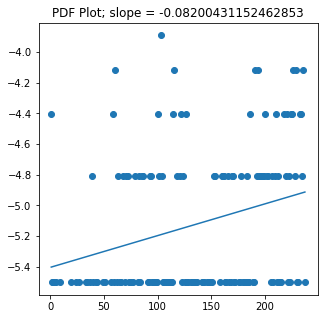

Slope of CCDF fitted line is:  -0.001979113070128888


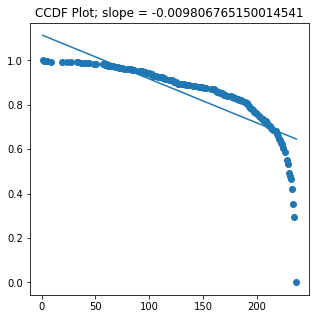

Slope of Zipf fitted line is:  -0.5803870100755324


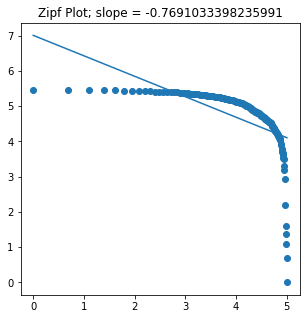

-0.5803870100755324

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math


# Function to count the number of nodes with each total degree
# Returns a dictionary of degree: number of nodes
def sum_degrees(graph):
    # dictionary to track the number of nodes that have a certain degree
    # key is degree, num nodes is the value and is incremented
    degree_num_nodes_dict = {}

    # loop through each node to build dictionary of degrees / number nodes with that degree
    for node in graph.nodes:

        # get node degree
        degree = graph.degree[node]

        # if this degree is already in the dict, increment it's value
        if degree in degree_num_nodes_dict:
            degree_num_nodes_dict[degree] += 1
        # otherwise, add degree to the dictionary and set its value to 1
        else:
            degree_num_nodes_dict[degree] = 1

    return degree_num_nodes_dict


# Function to plot the PDF, probability  density
# CHANGE FROM LINE TO FITTED LINE
def pdf(graph, total_nodes):

    # get dictionary of degree and total nodes w/ that degree
    degree_num_nodes_dict = sum_degrees(graph)

    # now make increasing list of degrees and take the log
    degree_list = []
    for degree_key in degree_num_nodes_dict.keys():
        degree_list.append(degree_key)
    degree_list.sort()

    # make corresponding Pk values list (log)
    pk_list = []
    log_degree_list = []
    for d in degree_list:
        # 𝑃(𝑘) = 𝑁𝑘 /𝑁 where 𝑁k = # nodes with degree 𝑘
        # might change to doing individually
        pk_list.append(math.log(((degree_num_nodes_dict[d]) / total_nodes)))
        log_degree_list.append(math.log(d))

    # now graph the PDF scatter and fitted line
    x = np.array(degree_list)
    y = np.array(pk_list)
    m, b = np.polyfit(x, y, 1)
    print("Slope of PDF fitted line is:  " + str(m))
    # add points to plot
    plt.title("PDF Plot; slope = -0.08200431152462853")
    plt.scatter(x, y)
    # add line of best fit to plot
    plt.plot(degree_list, m * x + b)
    plt.show()
    # return slope when you close out of the graph
    return m


# Function to plot Pareto CCDF - complementary cumula&ve distribu&on func&on
def pareto_ccdf(graph, total_nodes):
    # Probability of having a degree greater than x --> cumulatively sum PDF

    # get dictionary of degree and total nodes w/ that degree
    degree_num_nodes_dict = sum_degrees(graph)

    # now make increasing list of degrees and take the log
    degree_list = []
    for degree_key in degree_num_nodes_dict.keys():
        degree_list.append(degree_key)
    degree_list.sort()

    # make corresponding ccdf values list (log) for each degree
    ccdf_list = []
    log_degree_list = []

    cumulative = total_nodes

    for i in range(0, len(degree_list)):

        # get the log values for ccdf_i and degree and add to lists
        ccdf_list.append(math.log(cumulative)/math.log(total_nodes))
        log_degree_list.append(math.log(degree_list[i]))

        # subtract this degree's number of nodes from cumulative
        cumulative -= degree_num_nodes_dict[degree_list[i]]


    # now graph the CCDF scatter and best fit line
    x = np.array(degree_list)
    y = np.array(ccdf_list)
    m, b = np.polyfit(x, y, 1)
    print("Slope of CCDF fitted line is:  " + str(m))
    # add points to plot
    plt.title("CCDF Plot; slope = -0.009806765150014541")
    plt.scatter(x, y)
    # add line of best fit to plot
    plt.plot(degree_list, m * x + b)
    plt.show()
    return m

# Function to plot Zipf plot
def zipf(graph):
    # descending order of PDF
    # histogram of degrees
    # plot on x: rank of degrees: largest nodes to smallest
    # node with largest degree is ranked 1, 2nd largest degree
    # compute rank of degree
    degree_num_dict = sum_degrees(graph)

    # now make increasing list of degrees and take the log
    degree_list = []
    for degree_key in degree_num_dict.keys():
        degree_list.append(degree_key)
    degree_list.sort(reverse=True)

    log_rank_list = []
    log_degree_list = []
    for d in range(1,len(degree_list)+1):
        #log_rank_list.append(math.log(d))
        #log_degree_list.append(math.log(degree_list[d-1]))
        log_rank_list.append(math.log(d))
        log_degree_list.append(math.log(degree_list[d-1]))

    # now graph the Zipf scatter and best fit line
    x = np.array(log_rank_list)
    y = np.array(log_degree_list)
    m, b = np.polyfit(x, y, 1)
    print("Slope of Zipf fitted line is:  " + str(m))
    # add points to plot
    plt.title("Zipf Plot; slope = -0.7691033398235991")
    plt.scatter(x, y)
    # add line of best fit to plot
    plt.plot(log_rank_list, m * x + b)
    plt.show()
    return m

num_nodes = g.number_of_nodes()

pdf(g, num_nodes)
# the slope of PDF is -0.08200431152462853

pareto_ccdf(g, num_nodes)
# the slope of CCDF is -0.009806765150014541

zipf(g)
# the slope of Zipf is -1.126923076923077


